In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_excel('output4.xlsx')
data

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df,train_columns,test_columns,target_column):#第一个参数输入数据集，第二个参数输入列号，第三个参数输入制定列名
    ## gettting all the features except survived
    age_df=df[df.columns[train_columns]]
    temp_train = age_df.loc[age_df[target_column].notnull()] 
    temp_test = age_df.loc[age_df[target_column].isnull()] 
#     temp_train = age_df.loc[age_df.是否吸烟.notnull()] ## df with age values
#     temp_test = age_df.loc[age_df.是否吸烟.isnull()] ## df without age values
    
    y = temp_train[target_column].values ## setting target variables(age) in y 
    X = temp_train[temp_train.columns[test_columns]].values
    
    rmse = []
    nestimators = []
    predict_age=[]
    for n in [1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800]:
        rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1,random_state=0)
        rfr.fit(X, y)
        #由于已知数据空缺，用训练集里的数据算预测值，再用预测值与训练集已知数据比较，算模型得分
        #y_predict = rfr.predict(temp_train.iloc[:,x:z].values)
        y_predict = rfr.predict(temp_train[temp_train.columns[test_columns]].values)
        y_test=temp_train[target_column].values
        ##
        
        
        rmse=np.append(rmse,np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
        nestimators=np.append(nestimators,n)
        #predicted_age =np.append(predict_age,rfr.predict(temp_test.iloc[:,x:z].values))
        #predicted_age =np.append(predict_age,rfr.predict(temp_test.iloc[:,x:z].values))
        predict_age.append(rfr.predict(temp_test[temp_test.columns[test_columns]].values))
    
    
    index_of_minimum = np.argmin(rmse)#找到rmse数组的最小值，即最优值的索引
    predict_age=predict_age[index_of_minimum]
    predict_age1=predict_age.astype(int)
    print(index_of_minimum)
    df.loc[df[target_column].isnull(), target_column] = predict_age1
    
    
    # Creating a bar plot
    sns.set_style('whitegrid')
    plt.plot(nestimators,rmse,'ro',linestyle='dashed',linewidth=1,markersize=10)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features/RMSE")
    plt.savefig('output.png', dpi=4000, bbox_inches='tight')
    plt.show()
    return df
## Implementing the completing_age function in both train and test dataset. 

In [11]:
def write_special_values(df,special_condition,target_column,write_column):

    # 使用条件筛选出要修改的行
    rows_to_update = df.loc[df[target_column] == special_condition].index

    # 将指定列的值赋值为0
    df.loc[rows_to_update, write_column] = 0
    return df

In [12]:
data=write_special_values(data,2,'有没有被社区或以上医院的医生诊断过患有高血压','有没有采取措施来控制血压')
data=write_special_values(data,2,'有没有被社区或以上医院的医生诊断过患有高血压','采取了药物治疗来控制血压')
data=write_special_values(data,2,'有没有被社区或以上医院的医生诊断过患有高血压','采取了控制饮食来控制血压')
data=write_special_values(data,2,'有没有被社区或以上医院的医生诊断过患有高血压','采取了适量运动来控制血压')
data=write_special_values(data,2,'您有没有被社区或以上医院的医生诊断患有糖尿病','您有没有采取措施控制血糖')
data=write_special_values(data,2,'您有没有被社区或以上医院的医生诊断患有糖尿病','采取了药物治疗来控制血糖')
data=write_special_values(data,2,'您有没有被社区或以上医院的医生诊断患有糖尿病','采取了控制饮食来控制血糖')
data=write_special_values(data,2,'您有没有被社区或以上医院的医生诊断患有糖尿病','采取了适量运动来控制血糖')

9


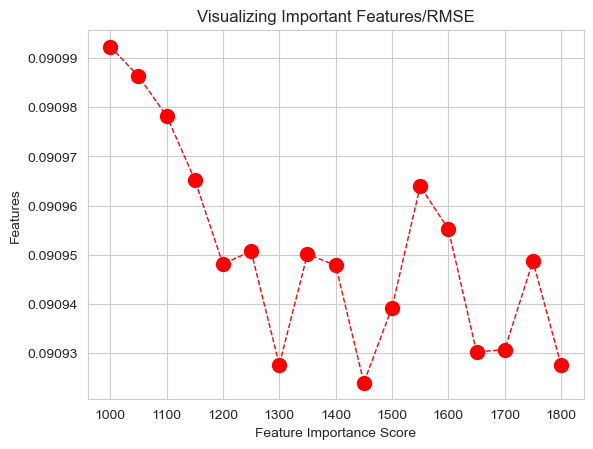

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [17]:
train_columns=[0,1,2,3,4,5,6,7,8,9,10,13,14,15,18,19,20,21,22,23,24,25,26,27,
               50,52,54,56,58,60,62,68,70,72,
               74,76,78,80,82,84,86,88,90,92,94,96,98,
               100,106,108,110,114,115,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,
              162,163,164,165,166,167,168,169,170,171,172,173,116]
test_columns=[]
for i in range(80):
    test_columns.append(i)
completing_age(data,train_columns,test_columns,'有没有被社区或以上医院的医生诊断过患有高血压')

7


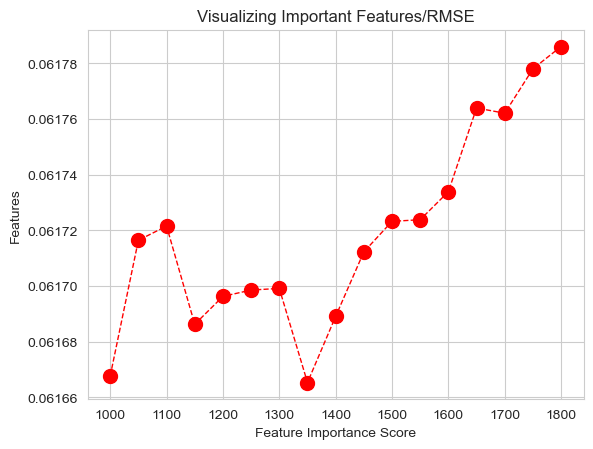

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [26]:
train_columns=[0,1,2,3,4,5,6,7,8,9,10,13,14,15,18,19,20,21,22,23,24,25,26,27,
               50,52,54,56,58,60,62,68,70,72,
               74,76,78,80,82,84,86,88,90,92,94,96,98,
               100,106,108,110,114,115,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,
              162,163,164,165,166,167,168,169,170,171,172,173,122]
test_columns=[]
for i in range(80):
    test_columns.append(i)
completing_age(data,train_columns,test_columns,'您有没有被社区或以上医院的医生诊断患有糖尿病')

In [28]:
data.to_excel('预处理最终版本.xlsx',index=False)